# Python for Data 14: Data Exploration and Cleaning
[back to index](https://www.kaggle.com/hamelg/python-for-data-analysis-index)

The first part of any data analysis or predictive modeling task is an initial exploration of the data. Even if you collected the data yourself and you already have a list of questions in mind that you want to answer, it is important to explore the data before doing any serious analysis, since oddities in the data can cause bugs and muddle your results. Before exploring deeper questions, you have to answer many simpler ones about the form and quality of data. That said, it is important to go into your initial data exploration with a big picture question in mind since the goal of your analysis should inform how you prepare the data.

This lesson aims to raise some of the questions you should consider when you look at a new data set for the first time and show how to perform various Python operations related to those questions. We are going to cover a lot of ground in this lesson, touching briefly on many topics from data cleaning to graphing to feature engineering. We will cover many of these topics in future lessons in greater detail.

In this lesson, we will explore the Titanic disaster training set.

## Exploring The Variables

The first step in exploratory analysis is reading in the data and then exploring the variables. It is important to get a sense of how many variables and cases there are, the data types of the variables and the range of values they take on.

We'll start by reading in the data:

In [1]:
# Load in some packages
%matplotlib inline


import numpy as np
import pandas as pd
import os

In [2]:
titanic_train = pd.read_csv("../input/train.csv")      # Read the data

It's a good idea to start off by checking the dimensions of your data set with df.shape and the variable data types of df.dtypes.

In [3]:
titanic_train.shape      # Check dimensions

(891, 12)

In [4]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The output shows us that we're working with a set of 891 records and 12 columns. Several of the column variables are encoded as numeric data types (ints and floats) but a few of them are encoded as "object". Let's check the head of the data to get a better sense of what the variables look like:

In [5]:
titanic_train.head(5)  # Check the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It appears we have a mixture of numeric columns and columns with text data. In data analysis, variables that split records into a fixed number of unique categories, such as Sex, are known as categorical variables. Pandas will attempt to interpret categorical variables as such when you load data, but you can specifically convert a variable to categorical if necessary, as we'll see later.

Note that if you're using a local Python environment with Spyder as your Python editor, you will see the data in the variable explorer pane, showing its type (DataFrame) and size. If you double click on the data in the variable explorer, you can see the data in a spreadsheet-like view that lets you sort by columns and edit values directly. You shouldn't rely too much on the variable explorer, however, since it doesn't work well when dealing with large data sets.

After getting a sense of the data's structure, it is a good idea to look at a statistical summary of the variables with df.describe():

In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Notice that non-numeric columns are dropped from the statistical summary provided by df.describe().

We can get a summary of the categorical variables by passing only those columns to describe():

In [7]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Youseff, Mr. Gerious",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


The categorical variable summary shows the count of non-NaN records, the number of unique categories, the most frequently occurring value and the number of occurrences of the most frequent value.

Although describe() gives a concise overview of each variable, it does not necessarily give us enough information to determine what each variable means. Certain variables like "Age" and "Fare" are self-explanatory, while others like "SibSp" and "Parch" are not. Whoever collects or provides data for download should also provide a list of variable descriptions. In this case, Kaggle provides a list of descriptions on the data download page:

In [8]:
# VARIABLE DESCRIPTIONS:
# survival        Survival
#                 (0 = No; 1 = Yes)
# pclass          Passenger Class
#                 (1 = 1st; 2 = 2nd; 3 = 3rd)
# name            Name
# sex             Sex
# age             Age
# sibsp           Number of Siblings/Spouses Aboard
# parch           Number of Parents/Children Aboard
# ticket          Ticket Number
# fare            Passenger Fare
# cabin           Cabin
# embarked        Port of Embarkation
#                 (C = Cherbourg; Q = Queenstown; S = Southampton)

After looking at the data for the first time, you should ask yourself a few questions:

1. Do I need all of the variables?
2. Should I transform any variables?
3. Are there NA values, outliers or other strange values?
4. Should I create new variables?
 
For the rest of this lesson we will address each of these questions in the context of this data set.

## Do I Need All of the Variables?

Getting rid of unnecessary variables is a good first step when dealing with any data set, since dropping variables reduces complexity and can make computation on the data faster. Whether you should get rid of a variable or not will depend on size of the data set and the goal of your analysis. With a data set as small as the Titanic data, there's no real need to drop variables from a computing perspective (we have plenty of memory and processing power to deal with such a small data set) but it can still be helpful to drop variables that will only distract from your goal.

This data set is provided in conjunction with a predictive modeling competition where the goal is to use the training data to predict whether passengers of the titanic listed in a second data set survived or not. We won't be dealing with the second data set (known the test set) right now, but we will revisit this competition and make predictions in a future lesson on predictive modeling.

Let's go through each variable and consider whether we should keep it or not in the context of predicting survival:
"PassengerId" is just a number assigned to each passenger. It is nothing more than an arbitrary identifier; we could keep it for identification purposes, but let's remove it anyway:

In [9]:
del titanic_train["PassengerId"]     # Remove PassengerId

"Survived" indicates whether each passenger lived or died. Since predicting survival is our goal, we definitely need to keep it.

Features that describe passengers numerically or group them into a few broad categories could be useful for predicting survival. The variables Pclass, Sex, Age, SibSp, Parch, Fare and Embarked appear to fit this description, so let's keep all of them.

We have 3 more features to consider: Name, Ticket and Cabin.

"Name" appears to be a character string of the name of each passenger. Let's look at name a little closer:

In [10]:
sorted(titanic_train["Name"])[0:15]   # Check the first 15 sorted names

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [11]:
titanic_train["Name"].describe()

count                      891
unique                     891
top       Youseff, Mr. Gerious
freq                         1
Name: Name, dtype: object

From the output above, we see that the Name variable has 889 unique values. Since there are 889 rows in the data set we know each name is unique. It appears that married women have their maiden names listed in parentheses. In general, a categorical variable that is unique to each case isn't useful for prediction. We could extract last names to try to group family members together, but even then the number of categories would be very large. In addition, the Parch and SibSp variables already contain some information about family relationships, so from the perspective of predictive modeling, the Name variable could be removed. On the other hand, it can be nice to have some way to uniquely identify particular cases and names are interesting from a personal and historical perspective, so let's keep Name, knowing that we won't actually use it in any predictive models we make.

Next, let's look closer at "Ticket":

In [12]:
titanic_train["Ticket"][0:15]       # Check the first 15 tickets

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [13]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Ticket has 680 unique values: almost as many as there are passengers. Categorical variables with almost as many levels as there are records are often not very useful for prediction. We could try to reduce the number of levels by grouping certain tickets together, but the ticket numbers don't appear to follow any logical pattern we could use for grouping. Let's remove it:

In [14]:
del titanic_train["Ticket"]        # Remove Ticket

Finally let's consider the "Cabin" variable:

In [15]:
titanic_train["Cabin"][0:15]       # Check the first 15 tickets

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [16]:
titanic_train["Cabin"].describe()  # Check number of unique cabins

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

Cabin also has 145 unique values, which indicates it may not be particularly useful for prediction. On the other hand, the names of the levels for the cabin variable seem to have a regular structure: each starts with a capital letter followed by a number. We could use that structure to reduce the number of levels to make categories large enough that they might be useful for prediction. Let's Keep Cabin for now.

As you might have noticed, removing variables is often more of an art than a science. It is easiest to start simple: don't be afraid to remove (or simply ignore) confusing, messy or otherwise troublesome variables temporarily when you're just getting starting with an analysis or predictive modeling task. Data projects are iterative processes: you can start with a simple analysis or model using only a few variables and then expand later by adding more and more of the other variables you initially ignored or removed.

## Should I Transform Any Variables?

When you first load a data set, some of the variables may be encoded as data types that don't fit well with what the data really is or what it means.

For instance, Survived is just an integer variable that takes on the value 0 or 1 depending on whether a passenger died or survived respectively. Variables that indicate a state or the presence or absence of something with the numbers 0 and 1 are sometimes called indicator variables or dummy variables (0 indicates absence and 1 indicates presence.). Indicator variables are essentially just a shorthand for encoding a categorical variable with 2 levels. We could instead encode Survived as a categorical variable with more descriptive categories:

In [17]:
new_survived = pd.Categorical(titanic_train["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


Survived looks a little nicer as categorical variable with appropriate category names, but even so, we're not going to change it. Why not? If you remember, our goal with this data set is predicting survival for the Kaggle competition. It turns out that when submitting predictions for the competition, the predictions need to be encoded as 0 or 1. It would only complicate things to transform Survived, only to convert it back to 0 and 1 later.

There's one more variable that has a questionable data encoding: Pclass. Pclass is an integer that indicates a passenger's class, with 1 being first class, 2 being second class and 3 being third class. Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric variable. What's more 1st class would be considered "above" or "higher" than second class, but when encoded as an integer, 1 comes before 2. We can fix this by transforming Pclass into an ordered categorical variable:

In [18]:
new_Pclass = pd.Categorical(titanic_train["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [19]:
titanic_train["Pclass"] = new_Pclass

Now it's time to revisit the Cabin variable. It appears that each Cabin is in a general section of the ship indicated by the capital letter at the start of each factor level:

In [20]:
titanic_train["Cabin"].unique()   # Check unique cabins

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

If we grouped cabin just by this letter, we could reduce the number of levels while potentially extracting some useful information.

In [21]:
char_cabin = titanic_train["Cabin"].astype(str) # Convert data to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


The output of describe() shows we succeeded in condensing Cabin into a handful of broader categories, but we also discovered something interesting: 688 of the records have Cabin are "n" which is shortened from "nan". In other words, more than 2/3 of the passengers do not have a cabin listed at all. Discovering and deciding how to handle these sorts of peculiarities is an important part working with data and there often isn't a single correct answer.

Since there are so many missing values, the Cabin variable might be devoid of useful information for prediction. On the other hand, a missing cabin variable could be an indication that a passenger died: after all, how would we know what cabin a passenger stayed in if they weren't around to tell the tale?

Let's keep the new cabin variable:

In [22]:
titanic_train["Cabin"] = new_Cabin

This is as far as we'll go with transformations right now, but know that the transformations we've covered here are just the tip of the iceberg.

## Are there NA Values, Outliers or Other Strange Values?

Data sets are often littered with missing data, extreme data points called outliers and other strange values. Missing values, outliers and strange values can negatively affect statistical tests and models and may even cause certain functions to fail.

In Python, you can detect missing values with the pd.isnull() function:

In [23]:
dummy_vector = pd.Series([1,None,3,None,7,8])

dummy_vector.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

Detecting missing values is the easy part: it is far more difficult to decide how to handle them. In cases where you have a lot of data and only a few missing values, it might make sense to simply delete records with missing values present. On the other hand, if you have more than a handful of missing values, removing records with missing values could cause you to get rid of a lot of data. Missing values in categorical data are not particularly troubling because you can simply treat NA as an additional category. Missing values in numeric variables are more troublesome, since you can't just treat a missing value as number. As it happens, the Titanic dataset has some NA's in the Age variable:

In [24]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Notice the count of age(712) is less than the total row count of hte data set(889). This indicates missing data. We can get the row indexes of the missing values with np.where():

In [25]:
missing = np.where(titanic_train["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [26]:
len(missing[0])

177

With 177 missing values it's probably not a good idea to throw all those records away. Here are a few ways we could deal with them:

1. Replace the null values with 0s
2. Replace the null values with some central value like the mean or median
3. Impute some other value
4. Split the data set into two parts: one set with where records have an Age value and another set where age is null.

Setting missing values in numeric data to zero makes sense in some cases, but it doesn't make any sense here because a person's age can't be zero. Setting all ages to some central number like the median is a simple fix but there's no telling whether such a central number is a reasonable estimate of age without looking at the distribution of ages. For all we know each age is equally common. We can quickly get a sense of the distribution of ages by creating a histogram of the age variable with df.hist():

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdb93ed4e0>]],
      dtype=object)

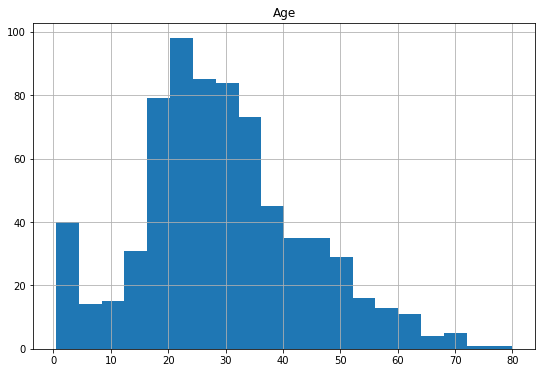

In [27]:
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

From the histogram, we see that ages between 20 and 30 are the most common, so filling in missing values with a central number like the mean or median wouldn't be entirely unreasonable. Let's fill in the missing values with the median value of 28:

In [28]:
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

titanic_train["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Since we just added a bunch of 28s to age, let's look at the histogram again for a sanity check. The bar representing 28 to be much taller this time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdb82cca20>]],
      dtype=object)

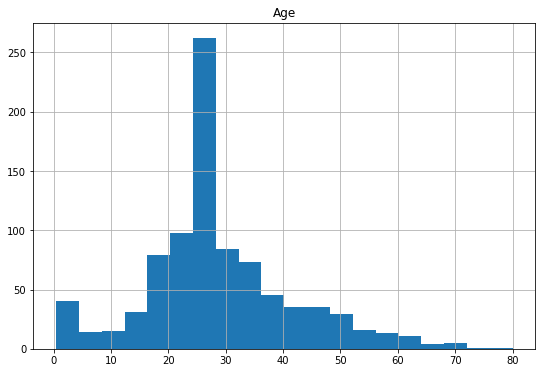

In [29]:
titanic_train.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

Some of the ages we assigned are probably way off, but it might be better than throwing entire records away. In practice, imputing the missing data (estimating age based on other variables) might have been a better option, but we'll stick with this for now.

Next, let's consider outliers. Outliers are extreme numerical values: values that lie far away from the typical values a variable takes on. Creating plots is one of the quickest ways to detect outliers. For instance, the histogram above shows that 1 or 2 passengers were near age 80. Ages near 80 are uncommon for this data set, but in looking at the general shape of the data seeing one or two 80 year olds doesn't seem particularly surprising.

Now let's investigate the "Fare" variable. This time we'll use a boxplot, since boxplots are designed to show the spread of the data and help identify outliers:

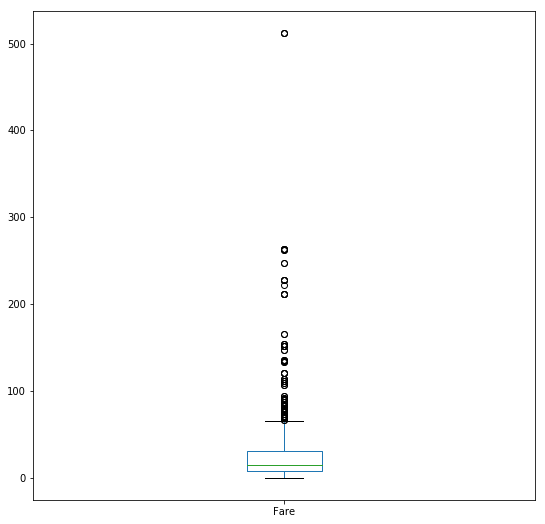

In [30]:
titanic_train["Fare"].plot(kind="box",
                           figsize=(9,9))

In a boxplot, the central box represents 50% of the data and the central bar represents the median. The dotted lines with bars on the ends are "whiskers" which encompass the great majority of the data and points beyond the whiskers indicate uncommon values. In this case, we have some uncommon values that are so far away from the typical value that the box appears squashed in the plot: this is a clear indication of outliers. Indeed, it looks like one passenger paid almost twice as much as any other passenger. Even the passengers that paid between 200 and 300 are far higher than the vast majority of the other passengers.

For interest's sake, let's check the name of this high roller:

In [31]:
index = np.where(titanic_train["Fare"] == max(titanic_train["Fare"]) )

titanic_train.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


In the graph there appears to be on passenger who paid more than all the others, but the output above shows that there were actually three passengers who all paid the same high fare.

Similar to NA values, there's no single cure for outliers. You can keep them, delete them or transform them in some way to try to reduce their impact. Even if you decide to keep outliers unchanged it is still worth identifying them since they can have disproportionately large influence on your results. Let's keep the three high rollers unchanged.

Data sets can have other strange values beyond missing values and outliers that you may need to address. Sometimes data is mislabeled or simply erroneous; bad data can corrupt any sort of analysis so it is important to address these sorts of issues before doing too much work.

## Should I Create New Variables?

The variables present when you load a data set aren't always the most useful variables for analysis. Creating new variables that are derivations or combinations existing ones is a common step to take before jumping into an analysis or modeling task.

For example, imagine you are analyzing web site auctions where one of the data fields is a text description of the item being sold. A raw block of text is difficult to use in any sort of analysis, but you could create new variables from it such as a variable storing the length of the description or variables indicating the presence of certain keywords.

Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new variable, Family, that combines SibSp and Parch to indicate the total number of family members (siblings, spouses, parents and children) a passenger has on board:

In [32]:
titanic_train["Family"] = titanic_train["SibSp"] + titanic_train["Parch"]

For interest's sake, let's find out who had the most family members on board:

In [33]:
most_family = np.where(titanic_train["Family"] == max(titanic_train["Family"]))

titanic_train.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10


There were 7 people on board with 8 siblings/spouses and 2 parents/children--they were probably all siblings of one another. Tragically, all 7 of them passed away. The 8th sibling is likely in the test data for which we are supposed make predictions. Would you predict that the final sibling survived or died?

## Wrap Up

In this lesson, we covered several general questions you should address when you first inspect a data set. Your first goal should be to explore the structure of the data to clean it and prepare the variables for your analysis. Once your data is it the right form, you can move from exploring structure to investigating relationships between variables. Since data cleaning and formatting is a vital and often time-consuming part of data analysis, it is important that we spend some time learning how to work with different types of data. Over the next few lessons, we'll learn about cleaning and preprocessing text data, numeric data and dates.

## Next Lesson: [Python for Data 15: Working With Text Data](https://www.kaggle.com/hamelg/python-for-data-15-working-with-text-data)
[back to index](https://www.kaggle.com/hamelg/python-for-data-analysis-index)